In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import json
import os
import random
import glob
from detectron_pro import detectron_mask_img, detectron_mask_img_composite, detectron_multi_mask_img
import shutil
import cv2

import random

In [2]:

# to get location that stickimg will sticked on jpg_dir center or random
def center_location(jpg_dir,stickimg_dir):
    im = np.array(Image.open(jpg_dir), dtype=np.uint8)
    x_center,y_center = im.shape[1]/2,im.shape[0]/2
    im_stick = np.array(Image.open(stickimg_dir), dtype=np.uint8)
    im_stick_shape = im_stick.shape
    bd_box_x,bd_box_y = x_center-(im_stick_shape[1]/2),y_center-(im_stick_shape[0]/2)
    bd_box_length,bd_box_height =im_stick_shape[1],im_stick_shape[0]
    return bd_box_x,bd_box_y,bd_box_length,bd_box_height

def random_location(jpg_dir,stickimg_dir):
    im = np.array(Image.open(jpg_dir), dtype=np.uint8)
    # x boundary
    rangeX = 120
    x_left_bound,x_right_bound = rangeX, im.shape[1]-rangeX
    x_center = random.randrange(x_left_bound, x_right_bound)
    seq = [350,300,250,200]
    y_center = random.choice(seq)
    i_shape1 = [128,64]
    i_shape2 = [128*7/8,64*7/8]
    i_shape3 = [128*3/4,64*3/4]
    i_shape4 = [128*2/4,64*2/4]
    dict = {350:i_shape1,300:i_shape2 ,250:i_shape3,200:i_shape4}
    image_shape = dict[y_center]
    bd_box_x,bd_box_y = x_center-(image_shape[1]/2),y_center-(image_shape[0]/2)
    bd_box_length,bd_box_height =image_shape[1],image_shape[0]
    return bd_box_x,bd_box_y,bd_box_length,bd_box_height

In [3]:
#it can generate json file defined by your street_jpg and people_jpg 

def create_json_file(jpg_dir,street_json,stickimg_dir,results_dir,function='center'):
    if function == 'center':
        bd_box_x,bd_box_y,bd_box_length,bd_box_height = center_location(jpg_dir,stickimg_dir)
    elif function == 'random':
        bd_box_x,bd_box_y,bd_box_length,bd_box_height = random_location(jpg_dir,stickimg_dir)
        
    input_file = open (street_json)
    json_array = json.load(input_file)
    
    data = []
    data.append({
    'end':0,
    'hide':0,
    'id':0,
    'init':0,
    'lbl':"pasted_person",
    'lock':0,
    'occl':0,
    'pos':[
    bd_box_x,
    bd_box_y,
    bd_box_length,
    bd_box_height],    
    'posv':[
    0,
    0,
    0,
    0],
    'str':0
                })
    
    if json_array != []:
        for item in json_array:
            data.append(item)
            
    with open(results_dir, 'w') as outfile:
        json.dump(data, outfile)

# Start create

In [4]:
people_dir = '/root/notebooks/final/Market-1501-v15.09.15'

# Image save dir
save_dir = '/root/notebooks/final/market_mask'

num_imgs = 20000

In [5]:
# Check dir folder exit
# If not, create one
if os.path.exists(save_dir) == False:
    os.makedirs(save_dir)

for s in ['market_people_mask']:
    if os.path.exists(os.path.join(save_dir, s)) == False:
        os.makedirs(os.path.join(save_dir, s))

In [6]:
people_imgs_ = glob.glob(people_dir+'/**/*.jpg', recursive=True)

random.shuffle(people_imgs_)

#people_imgs = random.sample(people_imgs, num_imgs)

In [7]:
len(people_imgs_)

61295

In [8]:
r_t_imgs = []
r_m_imgs = []

In [ ]:
for i in range(len(people_imgs_)):
    if (i%100==0):
        print("Process (",i,"/",len(people_imgs_),")  ","{:.2f}".format(100*i/len(people_imgs_))," %")
    try:
        mask_img = detectron_mask_img(people_imgs_[i],(64,128))
        mask_img = Image.fromarray(mask_img)
    except Exception as e:
        print("Skip image :",i)
        continue
    r_t_imgs.append(cv2.imread(people_imgs_[i]))
    r_m_imgs.append(mask_img)

In [67]:
mask_img = detectron_multi_mask_img(people_imgs_[46],(64,128))

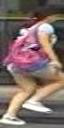

In [70]:
Image.open(people_imgs_[46])

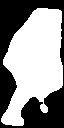

In [71]:
Image.fromarray(mask_img)

In [14]:
ou['instances'].pred_classes.cpu().numpy()

NameError: name 'ou' is not defined

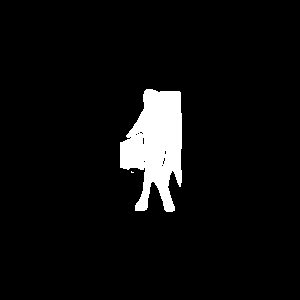

In [36]:
psize = 400

mask = ou["instances"].pred_masks.cpu().numpy()[2]+ou["instances"].pred_masks.cpu().numpy()[0]+ou["instances"].pred_masks.cpu().numpy()[1]

Image.fromarray(mask)

In [40]:
ou["instances"].pred_masks.cpu().numpy()[2].shape

(300, 300)